In [1]:
import warnings
warnings.filterwarnings("ignore")
import algorithms_class as alg

In [2]:
import pandas as pd
df = pd.read_csv("../dataset/galaxy.csv")
target = 'class'
features = df.columns.drop(target)
X = df[features]
y = df[target]
X

,eastwest,northsouth,angle,radialposition
0,8.462789,-38.173172,102.5,39.099998
1,7.964978,-35.927692,102.5,36.799999
2,7.467167,-33.682213,102.5,34.500001
3,6.969356,-31.436731,102.5,32.200000
4,6.471544,-29.191250,102.5,29.899999
...,...,...,...,...
318,-9.090464,41.004433,102.5,-42.000000
319,-9.588275,43.249912,102.5,-44.299999
320,-10.042798,45.300137,102.5,-46.400002
321,-10.540609,47.545616,102.5,-48.700001


In [3]:
corr = df.select_dtypes('number').corr()

<Axes: >

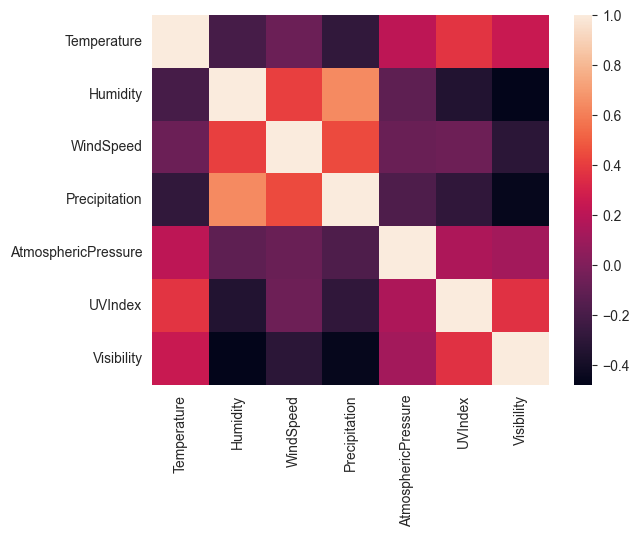

In [4]:
import seaborn as sns
sns.heatmap(corr)


In [5]:
import algorithms_class as alg

In [6]:
X_encoded = alg.encoding_categorical_variables(X)
X_encoded

,Temperature,Humidity,WindSpeed,Precipitation,AtmosphericPressure,UVIndex,Visibility,CloudCover_clear,CloudCover_cloudy,CloudCover_overcast,CloudCover_partlycloudy,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Location_coastal,Location_inland,Location_mountain
0,14.0,73,9.5,82.0,1010.82,2,3.5,False,False,False,True,False,False,False,True,False,True,False
1,39.0,96,8.5,71.0,1011.43,7,10.0,False,False,False,True,False,True,False,False,False,True,False
2,30.0,64,7.0,16.0,1018.72,5,5.5,True,False,False,False,False,True,False,False,False,False,True
3,38.0,83,1.5,82.0,1026.25,7,1.0,True,False,False,False,False,True,False,False,True,False,False
4,27.0,74,17.0,66.0,990.67,1,2.5,False,False,True,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,1003.15,1,1.0,False,False,True,False,False,False,True,False,False,False,True
13196,-1.0,76,3.5,23.0,1067.23,1,6.0,False,True,False,False,False,False,False,True,True,False,False
13197,30.0,77,5.5,28.0,1012.69,3,9.0,False,False,True,False,True,False,False,False,True,False,False
13198,3.0,76,10.0,94.0,984.27,0,2.0,False,False,True,False,False,False,False,True,False,True,False


In [7]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif
X_new = SelectKBest(mutual_info_classif, k=2).fit_transform(X_encoded, y)
X_new

array([[  82.  , 1010.82],
       [  71.  , 1011.43],
       [  16.  , 1018.72],
       ...,
       [  28.  , 1012.69],
       [  94.  ,  984.27],
       [  92.  , 1015.37]])

In [3]:
selected_features = ['eastwest','northsouth','radialposition']

In [4]:
classifiers = ['DecisionTree','LogisticRegression','KNN','RandomForest','AdaBoost','SVC']

TUNING

In [5]:
import numpy as np

In [18]:
classifier = 'DecisionTree'
param = 160
perf_mean = []
for param in [70,80,90,100,110,120]:
    perf_mean.append(alg.classification(X[selected_features], y, classifier, param, 8))
np.median(perf_mean)

Training for DecisionTree...
0.9484030743920273
Training for DecisionTree...
0.9277192861648086
Training for DecisionTree...
0.932825589029115
Training for DecisionTree...
0.9175257731958762
Training for DecisionTree...
0.9484147461386055
Training for DecisionTree...
0.9279992089842761


np.float64(0.9304123990066956)

In [35]:
classifier = 'LogisticRegression'
param = 1
perf_mean = []
for i in range(0,8):
    perf_mean.append(alg.classification(X[selected_features], y, classifier, param, 8))
np.median(perf_mean)

Training for LogisticRegression...
0.7618113970647158
Training for LogisticRegression...
0.7631751892047854
Training for LogisticRegression...
0.7633498681820983
Training for LogisticRegression...
0.7661925474058868
Training for LogisticRegression...
0.7627731843089012
Training for LogisticRegression...
0.7653536376083029
Training for LogisticRegression...
0.7621766802971015
Training for LogisticRegression...
0.7646598662632775


np.float64(0.7632625286934418)

In [25]:
classifier = 'KNN'
param = 15
perf_mean = []
for param in [5,6,7,8,9,10]:
    perf_mean.append(alg.classification(X[selected_features], y, classifier, param, 8))
np.median(perf_mean)

Training for KNN...
0.9434024938128631
Training for KNN...
0.9175115428683576
Training for KNN...
0.9483156032713544
Training for KNN...
0.9283428398712354
Training for KNN...
0.922548977029571
Training for KNN...
0.9178925466453756


np.float64(0.9254459084504032)

In [28]:
classifier = 'RandomForest'
param = 100
perf_mean = []
for param in [60,70,80,90,100,110,120]:
    perf_mean.append(alg.classification(X[selected_features], y, classifier, param, 8))
np.median(perf_mean)

Training for RandomForest...
0.9330462926260514
Training for RandomForest...
0.9536654639747424
Training for RandomForest...
0.9331592241357665
Training for RandomForest...
0.9379331405140126
Training for RandomForest...
0.9587716529910933
Training for RandomForest...
0.9380849207248323
Training for RandomForest...
0.9381443298969072


np.float64(0.9380849207248323)

In [32]:
classifier = 'AdaBoost'
param = 40
perf_mean = []
for param in [60,70,80,90,100]:
    perf_mean.append(alg.classification(X[selected_features], y, classifier, param, 8))
np.median(perf_mean)

Training for AdaBoost...
0.9536533005346678
Training for AdaBoost...
0.9485142210399502
Training for AdaBoost...
0.9278482011361245
Training for AdaBoost...
0.9384085360824113
Training for AdaBoost...
0.9378958809046334


np.float64(0.9384085360824113)

In [39]:
classifier = 'SVC'
param = 1
perf_mean = []
for i in range(0,8):
    perf_mean.append(alg.classification(X[selected_features], y, classifier, param, 8))
np.median(perf_mean)

Training for SVC...
0.6921419718859483
Training for SVC...
0.7000787580146697
Training for SVC...
0.6910931217390281
Training for SVC...
0.6537994713325095
Training for SVC...
0.7188799119249893
Training for SVC...
0.6538042930095884
Training for SVC...
0.6882557505998603
Training for SVC...
0.6794399291411048


np.float64(0.6896744361694442)

In [ ]:
### prova con i sample per i grafi
### partiamo da circa 0.72 come performance dirty per 70% di qualità

In [8]:
import dirty_data as d
import algorithms_class as a
import pandas as pd

m = 'DecisionTree'
df = pd.read_csv("../dataset/weather.csv")
name_class = 'WeatherType'
selected_features_only = ['Temperature', 'Precipitation', 'AtmosphericPressure']
selected_features = ['Temperature', 'Precipitation', 'AtmosphericPressure','WeatherType']
df = df[selected_features]

param = {
    'DecisionTree': 160,
    'LogisticRegression': 1,
    'KNN': 15,
    'RandomForest': 20,
    'AdaBoost': 40,
    'SVC': 1
}


for p in [1,0.5,0.3,0.2,0.1,0.05,0.01]:
    s = int(len(df)*p)
    print('--- '+str(s)+' number of samples ---')
    df_sample = df.sample(n=s).copy()
    df_dirt = d.injection(df_sample, name_class, 0.7, 10, 1)
    a.classification(df_dirt[selected_features_only], df_dirt[name_class], m, param[m], 4)
    print("\n")

--- 13200 number of samples ---
saved dirty dataset 70%
Training for DecisionTree...
0.7094684168561306


--- 6600 number of samples ---
saved dirty dataset 70%
Training for DecisionTree...
0.712228092567461


--- 3960 number of samples ---
saved dirty dataset 70%
Training for DecisionTree...
0.6976867507424532


--- 2640 number of samples ---
saved dirty dataset 70%
Training for DecisionTree...
0.6878443180633034


--- 1320 number of samples ---
saved dirty dataset 70%
Training for DecisionTree...
0.6475472707571986


--- 660 number of samples ---
saved dirty dataset 70%
Training for DecisionTree...
0.6108887529754827


--- 132 number of samples ---
saved dirty dataset 70%
Training for DecisionTree...
0.4894436122274997




In [9]:
m = 'RandomForest'

for p in [1,0.5,0.3,0.2,0.1,0.05,0.01]:
    s = int(len(df)*p)
    print('--- '+str(s)+' number of samples ---')
    df_sample = df.sample(n=s).copy()
    df_dirt = d.injection(df_sample, name_class, 0.7, 10, 1)
    a.classification(df_dirt[selected_features_only], df_dirt[name_class], m, param[m], 4)
    print("\n")


--- 13200 number of samples ---
saved dirty dataset 70%
Training for RandomForest...
0.7420618551354534


--- 6600 number of samples ---
saved dirty dataset 70%
Training for RandomForest...
0.7294237116323022


--- 3960 number of samples ---
saved dirty dataset 70%
Training for RandomForest...
0.7335683310103114


--- 2640 number of samples ---
saved dirty dataset 70%
Training for RandomForest...
0.7310744765754105


--- 1320 number of samples ---
saved dirty dataset 70%
Training for RandomForest...
0.7180195574573175


--- 660 number of samples ---
saved dirty dataset 70%
Training for RandomForest...
0.6945959399229524


--- 132 number of samples ---
saved dirty dataset 70%
Training for RandomForest...
0.6272408134306354




In [10]:
m = 'AdaBoost'

for p in [1,0.5,0.3,0.2,0.1,0.05,0.01]:
    s = int(len(df)*p)
    print('--- '+str(s)+' number of samples ---')
    df_sample = df.sample(n=s).copy()
    df_dirt = d.injection(df_sample, name_class, 0.7, 10, 1)
    a.classification(df_dirt[selected_features_only], df_dirt[name_class], m, param[m], 4)
    print("\n")


--- 13200 number of samples ---
saved dirty dataset 70%
Training for AdaBoost...
0.735333173422061


--- 6600 number of samples ---
saved dirty dataset 70%
Training for AdaBoost...
0.7244936277999517


--- 3960 number of samples ---
saved dirty dataset 70%
Training for AdaBoost...
0.7254587755172738


--- 2640 number of samples ---
saved dirty dataset 70%
Training for AdaBoost...
0.7045503025781839


--- 1320 number of samples ---
saved dirty dataset 70%
Training for AdaBoost...
0.6568563798868383


--- 660 number of samples ---
saved dirty dataset 70%
Training for AdaBoost...
0.6188844779460378


--- 132 number of samples ---
saved dirty dataset 70%
Training for AdaBoost...
0.5977593048713739


